# `arcesetc`: an exposure time calculator for [ARCES](https://www.apo.nmsu.edu/arc35m/Instruments/ARCES/)

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
import astropy.units as u

from arcesetc import plot_order_counts, plot_order_sn

### Given an exposure time, what are the counts, and S/N we can collect?

On the main sequence, `arcesetc` will return the nearest spectral type: 

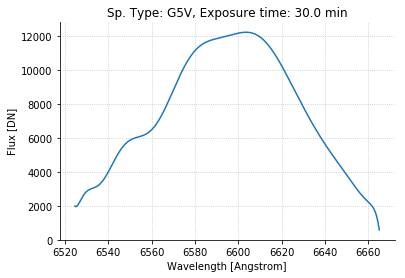

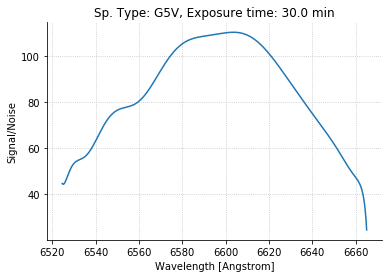

In [2]:
sptype = 'G4V'
wavelength = 6562 * u.Angstrom
exp_time = 30 * u.min
V = 10

fig, ax, exp_time = plot_order_counts(sptype, wavelength, V, exp_time=exp_time)
plt.show()

fig, ax, exp_time = plot_order_sn(sptype, wavelength, V, exp_time=exp_time)
plt.show()

### Given a S/N at a particular wavelength, what's the appropriate exposure time?

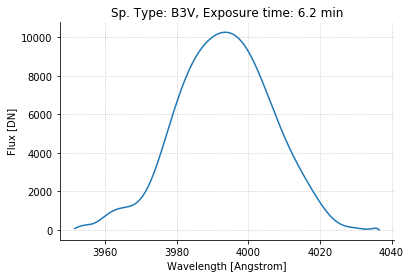

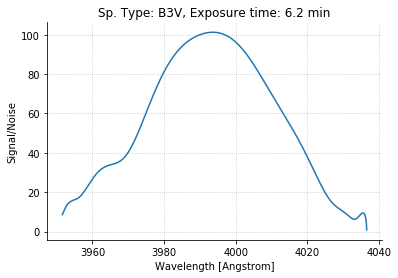

Exposure time: 372.5042381371759 s


In [3]:
sptype = 'B3V'
wavelength = 3990 * u.Angstrom
signal_to_noise = 100
V = 5

fig, ax, exp_time = plot_order_counts(sptype, wavelength, V, signal_to_noise=signal_to_noise)
plt.show()

fig, ax, exp_time = plot_order_sn(sptype, wavelength, V, signal_to_noise=signal_to_noise)
plt.show()

print('Exposure time: {0}'.format(exp_time))

We even have a Wolf-Rayet star, because Trevor!

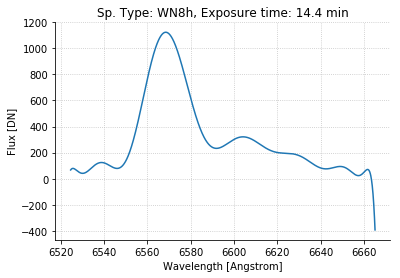

../arcesetc/plots.py:178: RuntimeWarning: invalid value encountered in sqrt
  sn = flux / np.sqrt(flux)


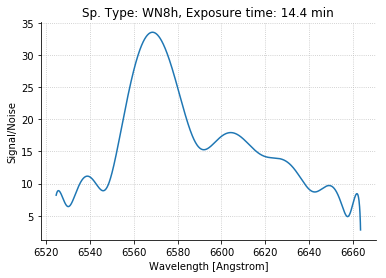

Exposure time: 866.9759517158114 s


In [4]:
sptype = 'WN8h'
wavelength = 6562 * u.Angstrom
signal_to_noise = 30
V = 14

fig, ax, exp_time = plot_order_counts(sptype, wavelength, V, signal_to_noise=signal_to_noise)
plt.show()

fig, ax, exp_time = plot_order_sn(sptype, wavelength, V, signal_to_noise=signal_to_noise)
plt.show()

print('Exposure time: {0}'.format(exp_time))

And a selection of giant stars courtesy of Emily Levesque: 

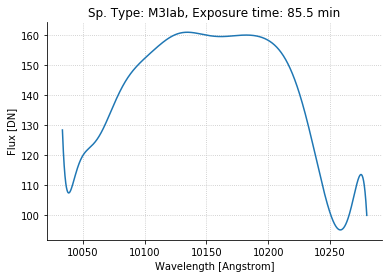

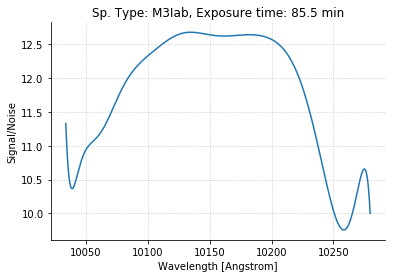

Exposure time: 5127.231263650157 s


In [5]:
sptype = 'M3Iab'
wavelength = 10500 * u.Angstrom
signal_to_noise = 10
V = 8

fig, ax, exp_time = plot_order_counts(sptype, wavelength, V, signal_to_noise=signal_to_noise)
plt.show()

fig, ax, exp_time = plot_order_sn(sptype, wavelength, V, signal_to_noise=signal_to_noise)
plt.show()

print('Exposure time: {0}'.format(exp_time))

### The available spectral types in the archive are: 

In [6]:
from arcesetc import available_sptypes
available_sptypes()

['A1:VpSiSrHg',
 'A1IVs',
 'A1V',
 'A1m',
 'A2m',
 'A2pv',
 'A9/F0V',
 'B3V',
 'B6IV',
 'B8V',
 'B9.5III',
 'B9.5V',
 'B9III',
 'B9IV',
 'C',
 'F3V',
 'F7V',
 'G0V',
 'G1.5IV-VFe-1',
 'G1.5V',
 'G2IV',
 'G2V',
 'G3V',
 'G3Va',
 'G5',
 'G5V',
 'G5V:',
 'G7V',
 'G8IVk',
 'G8V',
 'G9V',
 'K0',
 'K0V',
 'K0Ve',
 'K1V',
 'K2',
 'K2III-IV',
 'K2V',
 'K2Ve',
 'K3.5V',
 'K3V',
 'K4.5Ib',
 'K4V',
 'K5-M1Iab-Ib',
 'K5/M0Ib',
 'K5V',
 'K5Ve',
 'K6V',
 'K7',
 'K7V',
 'K8V',
 'M0-M1.5Iab',
 'M0.5Iab',
 'M0.5Ib',
 'M0V',
 'M1-M2Ia-Iab',
 'M1.5Ib',
 'M2II',
 'M2Ia',
 'M2Ia-Iab',
 'M2Iab',
 'M2Iab-Ib',
 'M2V',
 'M3-M4Iab',
 'M3.5IabFe-1',
 'M3Iab',
 'M3Iab-Ib',
 'M3Iab-M5I',
 'M4.5-7Iae',
 'M6',
 'N',
 'O4.5III(f)',
 'O6.5V((f))z',
 'O7Vzvar?',
 'O9IIIvar',
 'O9IV(n)+B1.5V',
 'SC6:/9e',
 'WN8h',
 'sdO2VIIIHe5']

Ask for something we don't have, and we'll suggest something close: 

In [7]:
from arcesetc import signal_to_noise_to_exp_time

sptype = 'M4Ia'
wavelength = 6562 * u.Angstrom
signal_to_noise = 30
V = 12

fig, ax, exp_time = plot_order_counts(sptype, wavelength, V, signal_to_noise=signal_to_noise)

ValueError: We don't have a match to this spectral type. The nearest ones we have on hand are: ['M2Ia', 'M3Iab', 'M3-M4Iab']

### We can also compute the exposure time required to collect a given S/N (without plots) with this function: 

#### We have limited support for evolved stars where available: 

In [8]:
sptype = 'B6IV'
wavelength = 6562 * u.Angstrom
signal_to_noise1 = 30
V = 8

signal_to_noise_to_exp_time(sptype, wavelength, V, signal_to_noise)

<Quantity 58.87715868 s>